C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_3684\2633108941.py:25: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')



Información general del dataset antes de eliminar columnas:
<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1304 non-null   int64         
 1   date                  1304 non-null   datetime64[ns]
 2   year                  1304 non-null   int64         
 3   source_database       1304 non-null   object        
 4   attack_description    1304 non-null   object        
 5   country               1304 non-null   object        
 6   industry_type         1304 non-null   object        
 7   subcategory           1304 non-null   object        
 8   attack_details        1304 non-null   object        
 9   ti_safe_score         638 non-null    float64       
 10  impact                724 non-null    object        
 11  link_at_the_internet  1090 non-null   object        
dtypes: datetime64[ns](1)

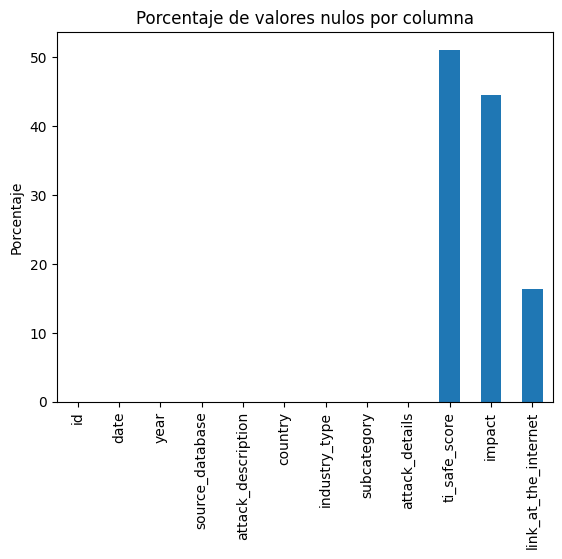


Información del dataset después de eliminar columnas con muchos nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1304 non-null   int64         
 1   date                  1304 non-null   datetime64[ns]
 2   year                  1304 non-null   int64         
 3   source_database       1304 non-null   object        
 4   attack_description    1304 non-null   object        
 5   country               1304 non-null   object        
 6   industry_type         1304 non-null   object        
 7   subcategory           1304 non-null   object        
 8   attack_details        1304 non-null   object        
 9   ti_safe_score         638 non-null    float64       
 10  impact                724 non-null    object        
 11  link_at_the_internet  1090 non-null   object        
dtypes: dateti

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = './data/TISAFE.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {file_path}")
    exit()

# Limpieza de datos
df.drop_duplicates(inplace=True)  # Eliminar duplicados

# Eliminar filas con nulos en columnas críticas
df.dropna(subset=['attack_description', 'country', 'industry_type', 'attack_details'], inplace=True)

# Normalizar columna industry_type
df['industry_type'] = df['industry_type'].str.strip().str.lower().replace({
    'gpver,emt': 'government',
    # ... otras correcciones
})

# Convertir columna date a formato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

# Eliminar columnas específicas
df.drop(['origin', 'attack_vector'], axis=1, inplace=True)

# Información general del dataset antes de eliminar columnas con muchos nulos
print("\nInformación general del dataset antes de eliminar columnas:")
df.info()
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos por columna:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Definir el umbral de eliminación de columnas (en porcentaje)
umbral_eliminacion = 70

# Calcular el porcentaje de valores nulos por columna y visualizar
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
porcentaje_nulos.plot(kind='bar', title='Porcentaje de valores nulos por columna')
plt.ylabel('Porcentaje')
plt.show()

# Obtener las columnas a eliminar
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral_eliminacion].index

# Eliminar las columnas con más del umbral de valores nulos
df.drop(columnas_a_eliminar, axis=1, inplace=True)

# Información final del dataset después de eliminar columnas
print("\nInformación del dataset después de eliminar columnas con muchos nulos:")
df.info()
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos por columna:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)